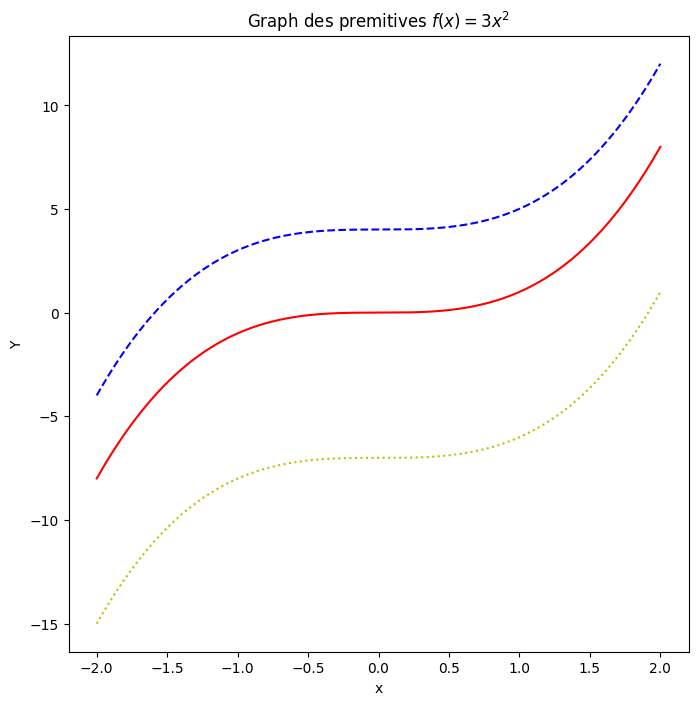

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)
f = 3 * x**2
F = x**3
k = 5 - F[np.abs(x-1).argmin()]
h = 8 - F[np.abs(x-1).argmin()]
G = F + k
H = F - h

plt.figure(figsize = (8,8))
plt.plot(x, F, label = '$F(x)=x^3$', color="r")
plt.plot(x, G, label = '$G(x)=x^3 + 4$, avec $G(1)=5$', linestyle = '--', color='b')
plt.plot(x, H,linestyle="dotted", color="y")
plt.xlabel('x')
plt.ylabel('Y')
plt.title('Graph des premitives $f(x)=3x^2$')
plt.savefig("../Outputs/Figures/Graph des premitive 1er exemple.png")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(t):
    return np.sin(t)
def g(t):
    return np.cos(t)
    
x_0 = 0
x_1  = 1
x_sin_vals = np.linspace(0, 2*np.pi, 400)
x_cos_vals = np.linspace(0, 2*np.pi, 400)
F_vals = [quad(f, x_0, x)[0] for x in x_sin_vals] #quad for calculate the integrales, we use [0] for estimate the errors (unteristed just in the results)
G_vals = [quad(g, x_0, x)[0] for x in x_cos_vals]


plt.figure(figsize=(8,6))
plt.plot(x_sin_vals, F_vals, label=r"$F(x)=\int_{0}^{x}\sin(t)\,dt$") 
plt.plot(x_cos_vals, G_vals, label=r"$G(x)=\int_{0}^{x}\cos(t)\,dt$")
plt.axhline(0, color='black', lw=1.0)
plt.scatter(x_0, 0, color='red', zorder=5, label=r"$F(0)=0$")
plt.xlabel("x")
plt.ylabel("F(x),G(x)")
plt.title("Primitive de $f(x)=\sin(x)$ qui s'annule en $x_0=0$")
plt.legend()
plt.grid(True)
plt.savefig("../Outputs/Figures/Continuite de f.png")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f_1(x):
    return x**2

def f_2(x):
    return x**2 -x

x = np.linspace(-1*np.pi**2,1*np.pi**2, 400)
F_x1 = [quad(f_1, 0, i)[0] for i in x]
F_x2 = [quad(f_2, 0, i)[0] for i in x]


plt.figure()
plt.plot(x, f_1(x), color='b', label=r"$f(x)=x^2$")
plt.plot(x, f_2(x), color='r', label=r"$f'(x)=x^2 - x$")
plt.axhline(0, color="black", lw=1.1)
plt.scatter(0, 0, color='black', zorder=1, label=r"f(x)=0")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.legend()
plt.grid(True)
plt.savefig("../Outputs/Figures/Fonction s'annulle dans 0 (1).png")
plt.show()

plt.figure()
plt.plot(x, F_x1, color="b", label=r"$F(x)=\int f(x) = \frac_{x^3}3$")
plt.plot(x, F_x2, color="r", label=r"$F(x)=\int f(x) = \frac_{x^3}3$")
plt.axhline(0, color="black", lw=1.1)
plt.scatter(0, 0, color='blue', zorder=5, label=r"f(x)=0")
plt.xlabel(r"$x$")
plt.ylabel(r"$F(x)$")
plt.grid(True)
plt.savefig("../Outputs/Figures/Primitive s'annulle dans 0 (2).png")
plt.show()

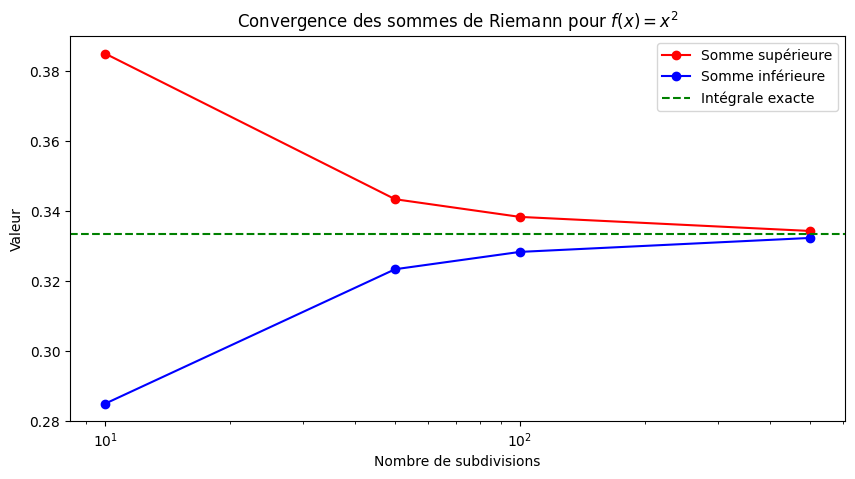

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f_continuous(x):
    return x**2

a, b=0, 1
exact_integral = (b**3 - a**3)/3 # 1/3
n_values, upper_sums, lower_sums = [10, 50, 100, 500], [], []

for n in n_values:
    x = np.linspace(a, b, n + 1)
    dx = (b - a)/n
    upper = sum(f_continuous(x[i+1]) * dx for i in range(n))
    lower = sum(f_continuous(x[i]) * dx for i in range(n))
    upper_sums.append(upper)
    lower_sums.append(lower)

plt.figure(figsize=(10, 5))
plt.plot(n_values, upper_sums, 'ro-', label='Somme supérieure')
plt.plot(n_values, lower_sums, 'bo-', label='Somme inférieure')
plt.axhline(exact_integral, color='green', linestyle='--', label='Intégrale exacte')
plt.xlabel('Nombre de subdivisions')
plt.ylabel('Valeur')
plt.title('Convergence des sommes de Riemann pour $f(x) = x^2$')
plt.legend()
plt.xscale('log')
plt.savefig("../Outputs/Figures/Convergence des sommes de Riemann.png")
plt.show()

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

def f_discontinuous(x):
    return np.where(x == 0.5, 0, 1)  # Discontinuité en 0.5

deltas = [0.1, 0.05, 0.01, 0.005]  # Largeur autour de la discontinuité
upper_sums_disc, lower_sums_disc = [], []

for delta in deltas:
    # Partition avec un intervalle étroit autour de 0.5
    partition = [0, 0.5 - delta/2, 0.5 + delta/2, 1]
    widths = np.diff(partition)
    upper = sum(widths * [1, 1, 1])  # Sup = 1 partout
    lower = sum(widths * [1, 0, 1])  # Inf = 0 autour de 0.5
    upper_sums_disc.append(upper)
    lower_sums_disc.append(lower)

plt.figure(figsize=(10, 5))
plt.plot(deltas, upper_sums_disc, 'ro-', label='Somme supérieure')
plt.plot(deltas, lower_sums_disc, 'bo-', label='Somme inférieure')
plt.axhline(1, color='green', linestyle='--', label='Valeur réelle (1)')
plt.xlabel('Largeur de l\'intervalle autour de la discontinuité')
plt.ylabel('Valeur')
plt.title('Convergence des sommes de Riemann avec une discontinuité')
plt.legend()
plt.gca().invert_xaxis()  # Plus petit delta à droite
plt.savefig("../Outputs/Figures/Convergence des sommes de Riemann avec discontinuite.png")
plt.show()

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\i'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Nonos\AppData\Local\Temp\ipykernel_5056\2739966120.py:14: SyntaxWarning: invalid escape sequence '\s'
  plot.plot(x, f(x), color="black", label="$f(x)=\sin(x)$", alpha=0.6)
C:\Users\Nonos\AppData\Local\Temp\ipykernel_5056\2739966120.py:21: SyntaxWarning: invalid escape sequence '\i'
  plt.title('Encadrement de $\int_{0}^{2\pi} \sin(x) \, dx$')


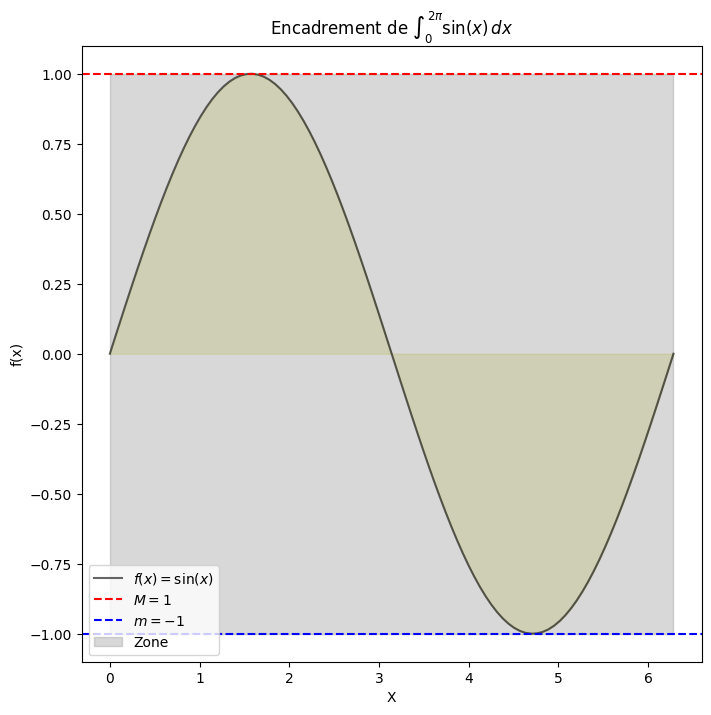

In [13]:
import numpy as np
import matplotlib.pyplot as plot

def f(x):
    return np.sin(x)

a,b = 0,2*np.pi
x = np.linspace(a,b,100)
m, M = -1,1

exact_integral = -np.cos(b) + np.cos(a)

plot.figure(figsize=(8,8))
plot.plot(x, f(x), color="black", label="$f(x)=\sin(x)$", alpha=0.6)
plot.fill_between(x, f(x), alpha=0.2, color="y")
plot.axhline(M, color='red', linestyle="--", label="$M=1$")
plot.axhline(m, color='blue', linestyle="--", label="$m=-1$")
plot.fill_between(x,m,M, color="gray", alpha=0.3, label="Zone")
plot.xlabel("X")
plot.ylabel("f(x)")
plt.title('Encadrement de $\int_{0}^{2\pi} \sin(x) \, dx$')
plt.legend()
plt.savefig("../Outputs/Figures/Encadrement d'une fonction (0).png")
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Nonos\AppData\Local\Temp\ipykernel_5056\1949201797.py:13: SyntaxWarning: invalid escape sequence '\i'
  plt.title('Majoration de $\int_{-1}^{1} |e^{-x^2}| \, dx$')


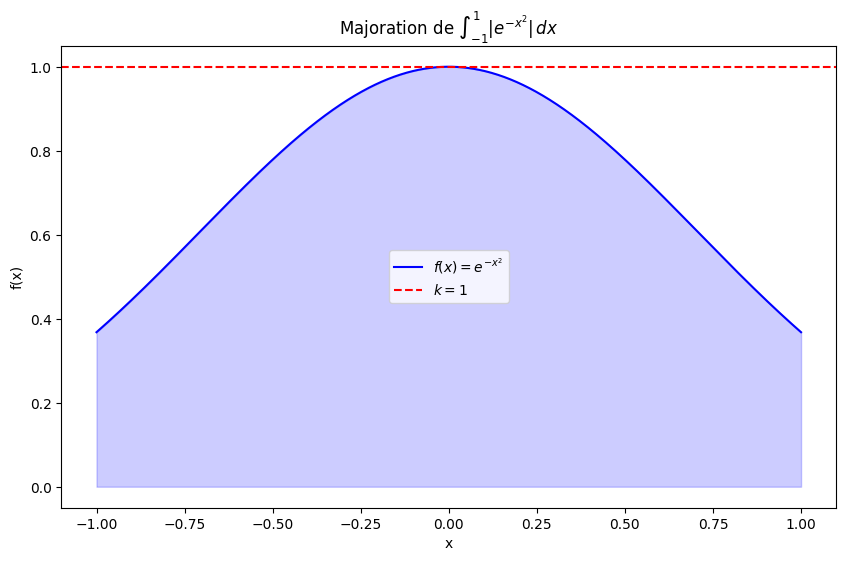

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 1000)
f = np.exp(-x**2)

plt.figure(figsize=(10, 6))
plt.plot(x, f, 'blue', label='$f(x) = e^{-x^2}$')
plt.fill_between(x, f, alpha=0.2, color='blue')
plt.axhline(1, color='red', linestyle='--', label='$k = 1$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Majoration de $\int_{-1}^{1} |e^{-x^2}| \, dx$')
plt.legend()
plt.savefig("../Outputs/Figures/Majorations.png")
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Nonos\AppData\Local\Temp\ipykernel_5056\2220336618.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, f, 'blue', label='$f(x) = \sin(x)$')
C:\Users\Nonos\AppData\Local\Temp\ipykernel_5056\2220336618.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Valeur moyenne de $\sin(x)$ sur $[0, 2\pi]$')
C:\Users\Nonos\AppData\Local\Temp\ipykernel_5056\2220336618.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  moyenne = (1 / (b - a)) * np.trapz(f, x)


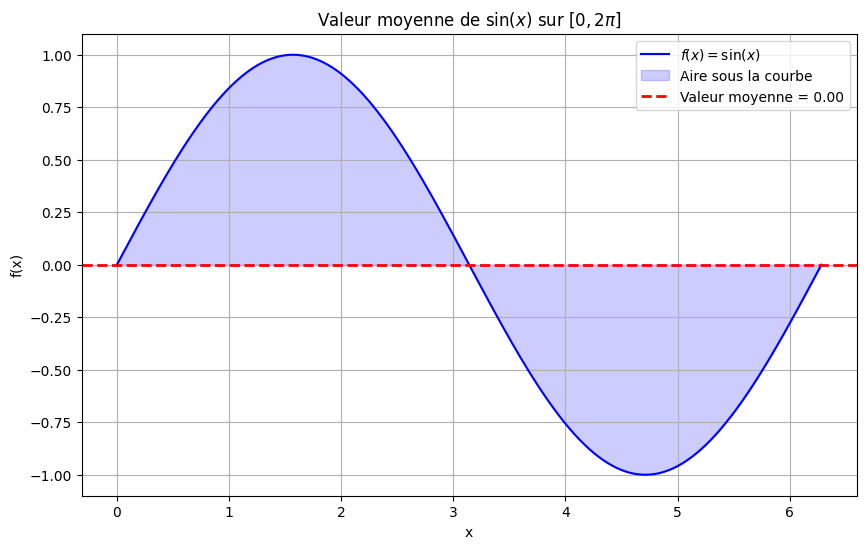

In [11]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 0, 2 * np.pi
x = np.linspace(a, b, 1000)
f = np.sin(x)

moyenne = (1 / (b - a)) * np.trapz(f, x)

plt.figure(figsize=(10, 6))
plt.plot(x, f, 'blue', label='$f(x) = \sin(x)$')
plt.fill_between(x, f, alpha=0.2, color='blue', label='Aire sous la courbe')
plt.axhline(moyenne, color='red', linestyle='--', linewidth=2, label=f'Valeur moyenne = {moyenne:.2f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Valeur moyenne de $\sin(x)$ sur $[0, 2\pi]$')
plt.legend()
plt.grid(True)
plt.savefig("../Outputs/Figures/Valeur moyenne.png")
plt.show()